In [1]:
from meme2jaspar import read_meme_file

## Prepare Motif PWM

[MEME Motif Formats - MEME Suite](https://meme-suite.org/meme/doc/meme-format.html)
The letter probability matrix is a table of probabilities where the **rows are positions** in the motif and the **columns are letters in the alphabet**. **The columns are ordered alphabetically** **so for DNA the first column is A, the second is C, the third is G and the last is T**. For protein motifs the columns come in the order A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W and Y (see also custom alphabet ordering). As each row contains the probability of each letter in the alphabet the probabilities in the row must sum to 1.

In [2]:
pwms = read_meme_file("MA0727.1.meme")
pwms

{'MA0727.1 NR3C2': array([[1.74961e-01, 1.39203e-01, 4.20293e-01, 2.65543e-01],
        [3.51855e-01, 5.29000e-03, 6.30334e-01, 1.25220e-02],
        [1.02000e-03, 1.43000e-04, 9.97762e-01, 1.07400e-03],
        [4.46970e-01, 3.51240e-02, 1.69626e-01, 3.48281e-01],
        [9.98770e-01, 4.99000e-04, 4.32000e-04, 2.99000e-04],
        [0.00000e+00, 9.99900e-01, 1.00000e-04, 0.00000e+00],
        [9.62604e-01, 8.04000e-04, 3.02440e-02, 6.34700e-03],
        [1.62354e-01, 4.03796e-01, 6.94760e-02, 3.64374e-01],
        [4.24144e-01, 1.13908e-01, 2.01230e-01, 2.60718e-01],
        [5.34291e-01, 4.50600e-02, 3.26868e-01, 9.37810e-02],
        [8.93400e-03, 2.21910e-02, 4.90000e-04, 9.68385e-01],
        [0.00000e+00, 1.53000e-04, 9.99847e-01, 0.00000e+00],
        [9.00000e-05, 5.16000e-04, 6.70000e-05, 9.99326e-01],
        [3.35924e-01, 1.79448e-01, 3.27910e-02, 4.51837e-01],
        [3.74000e-04, 9.97476e-01, 2.10000e-04, 1.93900e-03],
        [1.29250e-02, 5.92716e-01, 1.34330e-02, 3.80

## Prepare sequence

`NR3C1 8_151_910-8_151_927`

In [3]:
from Bio import Entrez, SeqIO
Entrez.email = "kuei.yueh.ko@duke.edu"

In [4]:
### init
gid = 568815581
loc_start = 8_151_163
loc_stop  = 8_152_064

### setup
handle = Entrez.efetch(
    db        = "nucleotide", 
    id        = gid, 
    rettype   = "fasta", 
    strand    = 1, 
    seq_start = loc_start, 
    seq_stop  = loc_stop)

### query
record = SeqIO.read(handle, "fasta")
handle.close()

### show results
print(record.seq)

GCCTCCAAGGCCTCGGAGCAGGAGGTGAGCTGGTCGCCTCCTATATTTAGGCCTCCAGGCTAATTTTATCCGGGGGCGGTGCCACCCCCGCTGCACATGCGCGCCGACGTGCGCGGCCCCACCACGCGCTTCCGCCGCCGCCACGGTCGCCAGGGAAACCGACGTCAGCTGCTGAGCTCAGCGGTTGCTGGAGGGACCACAGGAGGGCGGGAGGAGCGACCCCTCCCCCATTTCCCGGCGGAAGTGGGGGAACGGCCCACTCTCACACTGGTGGGCGCGGCCGGGGGGGTCACGCATCCCTTACATATCCCCAGTCCCAGGATGGCTCGGTGGCCGTAAGAAGTGGGACGGCCTATTAGGATCCCAGGGTTGGTCCTGGCTTCCCCAGGACGAAGCACAACGGCCACTGCCCTCGGCGCAAAAGCCCCTCAACCTGACTCTCGCCTGGATCCCAGTCATTCTGGTCAAGACAACACAACCTTTCCTTCTTTAGCCCCTGCGCTGCTTCCCCACCACAAGGACCGAAGCCGGCAACCTGCCATCGTCAAGGACCCGAGGATCCTCTCTCTTCAGTCCCCTACTTTTCTGGCCAGACCCCCCCACCAACCCCAAGCCTTGGGCAGAAGACACACAACAGCCAACAGATCTTTCTTCCCCTACTCCCCGTCCAACCACACCCCTACTACTGAGCATTTTCTGAGCGCCAGGGGAAAAGGGAAGGTTGTGGCCAACAGCAGGAACCAGCGCTGGGAACGGGATGTTCTAGTCCGAAGTGGGCTGACATCACAGGCGGCGCAGGGCCAGGGACTGGAGAACAGAGACACGGGGAGCGCTGAAAGCCTAATAGGGTCCTGGTACCGGGGCAAACCTGGGGCCCCTCGAGTAACGAGCAAGAAGACCGG


## One-Hot Encoding

In [5]:
import numpy as np
from sklearn import preprocessing

In [6]:
seq_str = record.seq
seq_arr = np.array(list(seq_str))
print(seq_arr)

['G' 'C' 'C' 'T' 'C' 'C' 'A' 'A' 'G' 'G' 'C' 'C' 'T' 'C' 'G' 'G' 'A' 'G'
 'C' 'A' 'G' 'G' 'A' 'G' 'G' 'T' 'G' 'A' 'G' 'C' 'T' 'G' 'G' 'T' 'C' 'G'
 'C' 'C' 'T' 'C' 'C' 'T' 'A' 'T' 'A' 'T' 'T' 'T' 'A' 'G' 'G' 'C' 'C' 'T'
 'C' 'C' 'A' 'G' 'G' 'C' 'T' 'A' 'A' 'T' 'T' 'T' 'T' 'A' 'T' 'C' 'C' 'G'
 'G' 'G' 'G' 'G' 'C' 'G' 'G' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'G'
 'C' 'T' 'G' 'C' 'A' 'C' 'A' 'T' 'G' 'C' 'G' 'C' 'G' 'C' 'C' 'G' 'A' 'C'
 'G' 'T' 'G' 'C' 'G' 'C' 'G' 'G' 'C' 'C' 'C' 'C' 'A' 'C' 'C' 'A' 'C' 'G'
 'C' 'G' 'C' 'T' 'T' 'C' 'C' 'G' 'C' 'C' 'G' 'C' 'C' 'G' 'C' 'C' 'A' 'C'
 'G' 'G' 'T' 'C' 'G' 'C' 'C' 'A' 'G' 'G' 'G' 'A' 'A' 'A' 'C' 'C' 'G' 'A'
 'C' 'G' 'T' 'C' 'A' 'G' 'C' 'T' 'G' 'C' 'T' 'G' 'A' 'G' 'C' 'T' 'C' 'A'
 'G' 'C' 'G' 'G' 'T' 'T' 'G' 'C' 'T' 'G' 'G' 'A' 'G' 'G' 'G' 'A' 'C' 'C'
 'A' 'C' 'A' 'G' 'G' 'A' 'G' 'G' 'G' 'C' 'G' 'G' 'G' 'A' 'G' 'G' 'A' 'G'
 'C' 'G' 'A' 'C' 'C' 'C' 'C' 'T' 'C' 'C' 'C' 'C' 'C' 'A' 'T' 'T' 'T' 'C'
 'C' 'C' 'G' 'G' 'C' 'G' 'G' 'A' 'A' 'G' 'T' 'G' 'G

In [8]:
enc_lab = preprocessing.LabelEncoder()
enc_hot = preprocessing.OneHotEncoder(sparse=False)

seq_int = enc_lab.fit_transform(seq_arr)
print(seq_int.shape)

arr = seq_int.reshape(-1, 1)
seq_hot = enc_hot.fit_transform(arr)
print(seq_hot.shape)

print("++++++++++++++++++++++++++++++++++++++++")
print(seq_int[:10]) 

print("++++++++++++++++++++++++++++++++++++++++")
print(enc_lab.classes_)
print(seq_hot[:10])

(902,)
(902, 4)
++++++++++++++++++++++++++++++++++++++++
[2 1 1 3 1 1 0 0 2 2]
++++++++++++++++++++++++++++++++++++++++
['A' 'C' 'G' 'T']
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


## Convolution

In [10]:
from numpy.lib.stride_tricks import sliding_window_view

In [9]:
pwm = pwms["MA0727.1 NR3C2"]
print(pwm)

[[1.74961e-01 1.39203e-01 4.20293e-01 2.65543e-01]
 [3.51855e-01 5.29000e-03 6.30334e-01 1.25220e-02]
 [1.02000e-03 1.43000e-04 9.97762e-01 1.07400e-03]
 [4.46970e-01 3.51240e-02 1.69626e-01 3.48281e-01]
 [9.98770e-01 4.99000e-04 4.32000e-04 2.99000e-04]
 [0.00000e+00 9.99900e-01 1.00000e-04 0.00000e+00]
 [9.62604e-01 8.04000e-04 3.02440e-02 6.34700e-03]
 [1.62354e-01 4.03796e-01 6.94760e-02 3.64374e-01]
 [4.24144e-01 1.13908e-01 2.01230e-01 2.60718e-01]
 [5.34291e-01 4.50600e-02 3.26868e-01 9.37810e-02]
 [8.93400e-03 2.21910e-02 4.90000e-04 9.68385e-01]
 [0.00000e+00 1.53000e-04 9.99847e-01 0.00000e+00]
 [9.00000e-05 5.16000e-04 6.70000e-05 9.99326e-01]
 [3.35924e-01 1.79448e-01 3.27910e-02 4.51837e-01]
 [3.74000e-04 9.97476e-01 2.10000e-04 1.93900e-03]
 [1.29250e-02 5.92716e-01 1.34330e-02 3.80926e-01]
 [2.10842e-01 4.04234e-01 1.80635e-01 2.04289e-01]]


In [16]:
win = sliding_window_view(seq_hot, pwm.shape)
res = win * pwm
res = res.sum(axis=-1).sum(axis=-1)

print(win.shape)
print(pwm.shape)
print(res.shape)

(886, 1, 17, 4)
(17, 4)
(886, 1)


In [19]:
902 - 17 + 1

886

## visualization

In [20]:
import matplotlib.pyplot as plt

In [24]:
print(loc_start, loc_stop)

8151163 8152064


In [32]:
len_mtf = 17
x = np.arange(loc_start + len_mtf//2, loc_stop - len_mtf//2 + 1)
print(len_mtf//2)
print(x.shape)

8
(886,)


In [33]:
y = res
print(y.shape)

(886, 1)


NR3C1 8_151_910-8_151_927

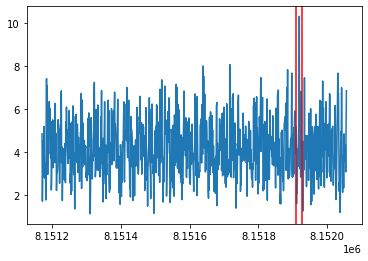

In [49]:
plt.plot(x, y)
plt.axvline(x=8_151_910, color="red")
plt.axvline(x=8_151_927, color="red")
plt.show()

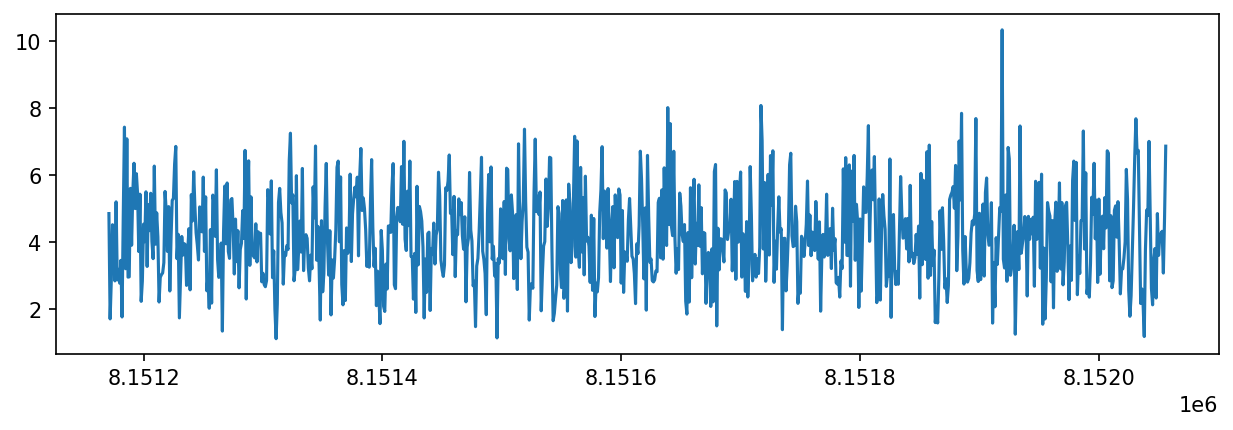

In [50]:
plt.figure(figsize=(10, 3), dpi=150)
plt.plot(x, y)
#plt.axvline(x=8_151_910, color="red")
#plt.axvline(x=8_151_927, color="red")
plt.show()